In [7]:
import pandas as pd

heart_file_path = 'cardio_data_processed.csv'
raw_df = pd.read_csv(heart_file_path)
raw_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [5]:
%pip install pandas numpy scikit-learn matplotlib seaborn
print('Packages installed into kernel environment.')

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


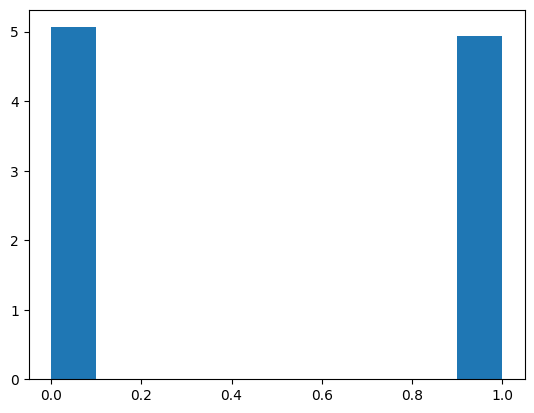

In [8]:
import matplotlib.pyplot as plt

plt.hist(raw_df['cardio'], density=1)
plt.show()
# dataset balanceado

In [12]:
# get target values and corresponding ids
df_targets_with_ids = raw_df[['id', 'cardio']]

# remove ids, bp_category_encoded, age (days version) and targets
# bp_category_encoded was supposed to be bp_category with proper processing for ML but it is not, so we drop it

df = raw_df.drop(columns=['id', 'age', 'cardio', 'bp_category_encoded'])
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,Normal


**Note:** Removed earlier manual encoding/scaling cells to avoid duplication and potential data leakage. All preprocessing now occurs inside the unified `ColumnTransformer` pipeline.

**Adjust bp_category for model input**

- bp_category: blood pressure category based from ap_hi and ap_lo: "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2" and  "Hypertensive Crisis"

Sum everything to get preproccessed dataset

**Create Pipeline for K-fold cross-validation**
1. Pre proccess data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

X = raw_df.drop('cardio', axis=1)
y = raw_df["cardio"]

numerical_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']
nominal_cols = ['gender', 'cholesterol', 'smoke', 'alco', 'active']
ordinal_cols = ['gluc', 'bp_category']

# Define order for ordinal features
ord_categories = [
    [1, 2, 3],
    ['Normal', "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]
]

# Unified column preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_cols),
        ("cat", OrdinalEncoder(handle_unknown="error"), nominal_cols),
        ("ord", OrdinalEncoder(categories=ord_categories), ordinal_cols)
    ]
)

**2. Select and evaluate models**

TODO:
- poda de arvore
- mais variações de split no Kfold
- teste com menos atributos
- plottar graficos de resultados e matrizes de confusão para cada algoritmo

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

**Decision Trees**

In [23]:
from sklearn.tree import DecisionTreeClassifier

models = {
    "gini": {
        "metric": "gini"
    },
    "entropy": {
        "metric": "entropy"
    }
}

results_tree = {}

for name, model in models.items():
    classifier = DecisionTreeClassifier(random_state=42, criterion=model["metric"])
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", classifier)
    ])
    acc = cross_val_score(pipe, X, y, cv=kfold, scoring="accuracy")
    prec = cross_val_score(pipe, X, y, cv=kfold, scoring="precision")
    rec = cross_val_score(pipe, X, y, cv=kfold, scoring="recall")
    f1 = cross_val_score(pipe, X, y, cv=kfold, scoring="f1")
    results_tree[name] = {
        "model": name,
        "accuracy_mean": acc.mean(),
        "accuracy_std": acc.std(),
        "precision_mean": prec.mean(),
        "precision_std": prec.std(),
        "recall_mean": rec.mean(),
        "recall_std": rec.std(),
        "f1_mean": f1.mean(),
        "f1_std": f1.std(),
    }

df_results_tree = pd.DataFrame(results_tree)
results["tree"] = df_results_tree
print(df_results_tree)

                    gini   entropy
model               gini   entropy
accuracy_mean   0.635115  0.637974
accuracy_std    0.004433  0.004337
precision_mean   0.63396  0.636298
precision_std   0.005238   0.00553
recall_mean     0.617456  0.622683
recall_std      0.005415  0.004351
f1_mean         0.625583  0.629398
f1_std           0.00429  0.003547


In [24]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 1) Obter candidatos de ccp_alpha a partir do caminho de poda, usando dados pré-processados
# Observação: isto serve apenas para sugerir bons níveis de poda; a avaliação continua usando CV com Pipeline
X_proc = preprocessor.fit_transform(X, y)
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_proc, y)
ccp_alphas = path.ccp_alphas

# Filtrar alphas positivos e selecionar quantis para cobrir vários níveis de poda
ccp_pos = ccp_alphas[ccp_alphas > 0]
if ccp_pos.size >= 3:
    quantis = np.linspace(0.05, 0.95, 10)
    alpha_candidates = np.unique(np.round(np.quantile(ccp_pos, quantis), 6))
else:
    # Fallback: grade fixa pequena, caso o caminho de poda não forneça variedade
    alpha_candidates = np.array([0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.01])

results_tree_pruned = {}
criteria = ["gini", "entropy"]

for crit in criteria:
    for alpha in alpha_candidates:
        model_label = f"{crit}_a{alpha}"
        classifier = DecisionTreeClassifier(random_state=42, criterion=crit, ccp_alpha=float(alpha))
        pipe = Pipeline([
            ("preprocessor", preprocessor),
            ("model", classifier)
        ])
        acc = cross_val_score(pipe, X, y, cv=kfold, scoring="accuracy")
        prec = cross_val_score(pipe, X, y, cv=kfold, scoring="precision")
        rec = cross_val_score(pipe, X, y, cv=kfold, scoring="recall")
        f1 = cross_val_score(pipe, X, y, cv=kfold, scoring="f1")
        results_tree_pruned[model_label] = {
            "model": model_label,
            "accuracy_mean": acc.mean(),
            "accuracy_std": acc.std(),
            "precision_mean": prec.mean(),
            "precision_std": prec.std(),
            "recall_mean": rec.mean(),
            "recall_std": rec.std(),
            "f1_mean": f1.mean(),
            "f1_std": f1.std(),
        }

import pandas as pd
df_results_tree_pruned = pd.DataFrame(results_tree_pruned)
results["tree_pruned"] = df_results_tree_pruned
print("Pruned Decision Trees — variants:")
print(df_results_tree_pruned)

Pruned Decision Trees — variants:
                gini_a4e-06  gini_a7e-06  gini_a1e-05  gini_a1.2e-05  \
model           gini_a4e-06  gini_a7e-06  gini_a1e-05  gini_a1.2e-05   
accuracy_mean      0.634748     0.634308     0.635261       0.639015   
accuracy_std       0.004255     0.004253     0.003729       0.003851   
precision_mean     0.633301     0.631884     0.632748       0.637454   
precision_std      0.004941     0.004973     0.004277       0.004501   
recall_mean         0.61808     0.621198     0.622565       0.623366   
recall_std         0.005473     0.004931     0.004627       0.005439   
f1_mean            0.625583     0.626482     0.627605       0.630316   
f1_std              0.00424     0.004023     0.003674       0.003951   

                gini_a1.3e-05  gini_a1.5e-05  gini_a1.8e-05  gini_a2e-05  \
model           gini_a1.3e-05  gini_a1.5e-05  gini_a1.8e-05  gini_a2e-05   
accuracy_mean         0.64029       0.643017       0.655377     0.660303   
accuracy_std     

**Decision Trees (Pruned): múltiplos níveis de poda**
A variação abaixo avalia diversas intensidades de poda via `ccp_alpha` (Cost-Complexity Pruning) para os critérios `gini` e `entropy`, usando a mesma validação cruzada estratificada. As alphas são derivadas do caminho de poda do conjunto pré-processado e os resultados são adicionados em `results["tree_pruned"]`. 

**Naive Bayes**

In [18]:
from sklearn.naive_bayes import GaussianNB

results_bayes = {}
classifier = GaussianNB()
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", classifier)
])
acc = cross_val_score(pipe, X, y, cv=kfold, scoring="accuracy")
prec = cross_val_score(pipe, X, y, cv=kfold, scoring="precision")
rec = cross_val_score(pipe, X, y, cv=kfold, scoring="recall")
f1 = cross_val_score(pipe, X, y, cv=kfold, scoring="f1")
results_bayes["naive_bayes"] = {
    "model": "naive bayes",
    "accuracy_mean": acc.mean(),
    "accuracy_std": acc.std(),
    "precision_mean": prec.mean(),
    "precision_std": prec.std(),
    "recall_mean": rec.mean(),
    "recall_std": rec.std(),
    "f1_mean": f1.mean(),
    "f1_std": f1.std(),
}

df_results_bayes = pd.DataFrame(results_bayes)
results["naive_bayes"] = df_results_bayes
print(df_results_bayes)

                naive_bayes
model           naive bayes
accuracy_mean      0.714537
accuracy_std       0.003299
precision_mean     0.748098
precision_std      0.003797
recall_mean        0.635899
recall_std         0.004664
f1_mean            0.687445
f1_std              0.00392


**KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# p = 1 ---> manhattan
# p = 2 ---> euclidian

models = {
    "5": {
        "k": 5,
        "p": [1, 2]
    },
    "7": {
        "k": 7,
        "p": [1, 2]
    },
    "9": {
        "k": 9,
        "p": [1, 2]
    },
    "13": {
        "k": 13,
        "p": [1, 2]
    },
}

results_knn = {}

for name, model in models.items():
    for p in model["p"]:
        classifier = KNeighborsClassifier(n_neighbors=model["k"], p=p)
        pipe = Pipeline([
            ("preprocessor", preprocessor),
            ("model", classifier)
        ])
        acc = cross_val_score(pipe, X, y, cv=kfold, scoring="accuracy")
        prec = cross_val_score(pipe, X, y, cv=kfold, scoring="precision")
        rec = cross_val_score(pipe, X, y, cv=kfold, scoring="recall")
        f1 = cross_val_score(pipe, X, y, cv=kfold, scoring="f1")
        key = f"{name}_p{p}"
        results_knn[key] = {
            "model": name,
            "p": p,
            "distance": "euclidian" if p == 2 else "manhattan",
            "accuracy_mean": acc.mean(),
            "accuracy_std": acc.std(),
            "precision_mean": prec.mean(),
            "precision_std": prec.std(),
            "recall_mean": rec.mean(),
            "recall_std": rec.std(),
            "f1_mean": f1.mean(),
            "f1_std": f1.std(),
        }

# Build DataFrame once after collecting all variants
df_results_knn = pd.DataFrame(results_knn)
results["knn"] = df_results_knn
print(df_results_knn)

                     5_p1       5_p2       7_p1       7_p2       9_p1  \
model                   5          5          7          7          9   
p                       1          2          1          2          1   
distance        manhattan  euclidian  manhattan  euclidian  manhattan   
accuracy_mean    0.695902   0.695653   0.704684   0.704699   0.712264   
accuracy_std     0.001134   0.002542   0.002309   0.002078   0.003251   
precision_mean   0.695177   0.695232    0.70669   0.706893   0.716651   
precision_std     0.00235   0.004236   0.003507   0.003643   0.004548   
recall_mean      0.683951   0.682971    0.68698   0.686565   0.690039   
recall_std          0.003   0.003969   0.004324   0.003053   0.004464   
f1_mean          0.689509   0.689029   0.696681   0.696568   0.703078   
f1_std           0.000977   0.001975   0.002326   0.001532   0.003122   

                     9_p2      13_p1      13_p2  
model                   9         13         13  
p                      

**Logistic Regression**


In [20]:
from sklearn.linear_model import LogisticRegression

iters = [250, 500, 750, 1000]
results_logistic = {}

for iter in iters:
    classifier = LogisticRegression(max_iter=iter, random_state=42)
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", classifier)
    ])
    acc = cross_val_score(pipe, X, y, cv=kfold, scoring="accuracy")
    prec = cross_val_score(pipe, X, y, cv=kfold, scoring="precision")
    rec = cross_val_score(pipe, X, y, cv=kfold, scoring="recall")
    f1 = cross_val_score(pipe, X, y, cv=kfold, scoring="f1")
    results_logistic[f"logistic{iter}"] = {
        "model": f"logistic{iter}",
        "accuracy_mean": acc.mean(),
        "accuracy_std": acc.std(),
        "precision_mean": prec.mean(),
        "precision_std": prec.std(),
        "recall_mean": rec.mean(),
        "recall_std": rec.std(),
        "f1_mean": f1.mean(),
        "f1_std": f1.std(),
    }

df_results_logistic = pd.DataFrame(results_logistic)
results["logistic"] = df_results_logistic
print(df_results_logistic)

                logistic250  logistic500  logistic750  logistic1000
model           logistic250  logistic500  logistic750  logistic1000
accuracy_mean      0.726398     0.726398     0.726398      0.726398
accuracy_std       0.001773     0.001773     0.001773      0.001773
precision_mean     0.752782     0.752782     0.752782      0.752782
precision_std      0.002788     0.002788     0.002788      0.002788
recall_mean        0.663816     0.663816     0.663816      0.663816
recall_std         0.002867     0.002867     0.002867      0.002867
f1_mean            0.705499     0.705499     0.705499      0.705499
f1_std             0.001895     0.001895     0.001895      0.001895


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Build a ccp_alpha grid for Random Forest:
# Try to reuse alpha_candidates from the Decision Tree pruning path if available;
# otherwise, derive a compact grid from a fresh path.
try:
    ccp_candidates = alpha_candidates
    if not isinstance(ccp_candidates, np.ndarray):
        ccp_candidates = np.array(list(ccp_candidates), dtype=float)
except NameError:
    from sklearn.tree import DecisionTreeClassifier
    X_proc = preprocessor.fit_transform(X, y)
    path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_proc, y)
    ccp_pos = path.ccp_alphas[path.ccp_alphas > 0]
    if ccp_pos.size >= 3:
        quantis = np.linspace(0.05, 0.95, 8)
        ccp_candidates = np.unique(np.round(np.quantile(ccp_pos, quantis), 6))
    else:
        ccp_candidates = np.array([1e-06, 5e-06, 1e-05, 2e-05])

# Ensure we include 0.0 for "no pruning"
rf_alpha_candidates = np.unique(np.concatenate(([0.0], ccp_candidates)))

# Define a few sensible Random Forest base variants
rf_variants = [
    {"label": "n100_mdNone", "n_estimators": 100, "max_depth": None},
    {"label": "n200_mdNone", "n_estimators": 200, "max_depth": None},
    {"label": "n300_mdNone", "n_estimators": 300, "max_depth": None},
    {"label": "n200_md10",  "n_estimators": 200, "max_depth": 10},
    {"label": "n300_md10",  "n_estimators": 300, "max_depth": 10},
]

results_random_forest = {}

for v in rf_variants:
    for alpha in rf_alpha_candidates:
        classifier = RandomForestClassifier(
            n_estimators=v["n_estimators"],
            max_depth=v["max_depth"],
            ccp_alpha=float(alpha),
            random_state=42,
            n_jobs=-1,
        )
        pipe = Pipeline([
            ("preprocessor", preprocessor),
            ("model", classifier)
        ])
        acc = cross_val_score(pipe, X, y, cv=kfold, scoring="accuracy")
        prec = cross_val_score(pipe, X, y, cv=kfold, scoring="precision")
        rec = cross_val_score(pipe, X, y, cv=kfold, scoring="recall")
        f1 = cross_val_score(pipe, X, y, cv=kfold, scoring="f1")

        key = f"{v['label']}_a{alpha}"
        results_random_forest[key] = {
            "model": key,
            "n_estimators": v["n_estimators"],
            "max_depth": v["max_depth"],
            "ccp_alpha": float(alpha),
            "accuracy_mean": acc.mean(),
            "accuracy_std": acc.std(),
            "precision_mean": prec.mean(),
            "precision_std": prec.std(),
            "recall_mean": rec.mean(),
            "recall_std": rec.std(),
            "f1_mean": f1.mean(),
            "f1_std": f1.std(),
        }

# Aggregate and store in the global results dict
import pandas as pd
df_results_random_forest = pd.DataFrame(results_random_forest)
results["random_forest"] = df_results_random_forest
print(df_results_random_forest)

# Report best variant (by accuracy)
best_rf_key = df_results_random_forest.loc['accuracy_mean'].idxmax()
print("Best RF variant (by accuracy_mean):", best_rf_key)

                n100_mdNone  n200_mdNone  n300_mdNone  n200_md10  n300_md10
model           n100_mdNone  n200_mdNone  n300_mdNone  n200_md10  n300_md10
n_estimators            100          200          300        200        300
max_depth              None         None         None         10         10
accuracy_mean      0.708438     0.708628     0.709376   0.733436   0.733333
accuracy_std       0.002217     0.002334     0.002574   0.001853   0.001733
precision_mean     0.708229     0.708262     0.709295   0.757256   0.758506
precision_std      0.003623     0.003637     0.003968   0.003549   0.003464
recall_mean        0.696276       0.6969     0.697048    0.67715   0.674685
recall_std          0.00392     0.003846     0.004107   0.003112   0.003785
f1_mean            0.702197     0.702522     0.703103   0.714955   0.714131
f1_std             0.001975     0.002112     0.002328   0.001735   0.001856


3. Evaluate models

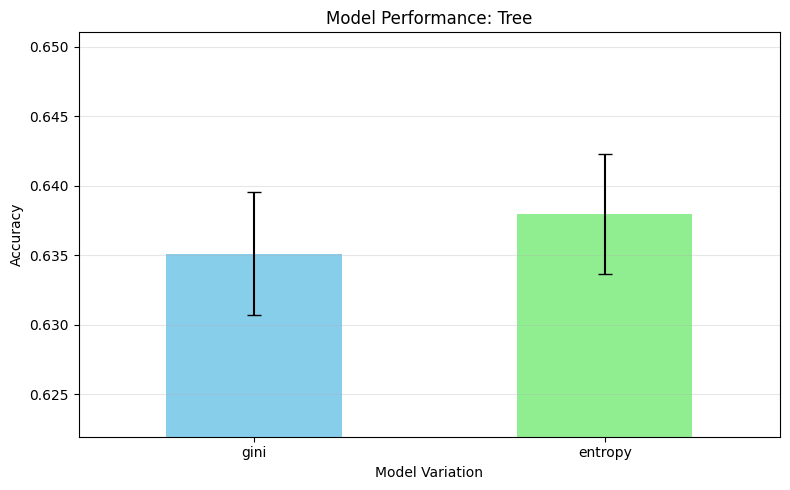

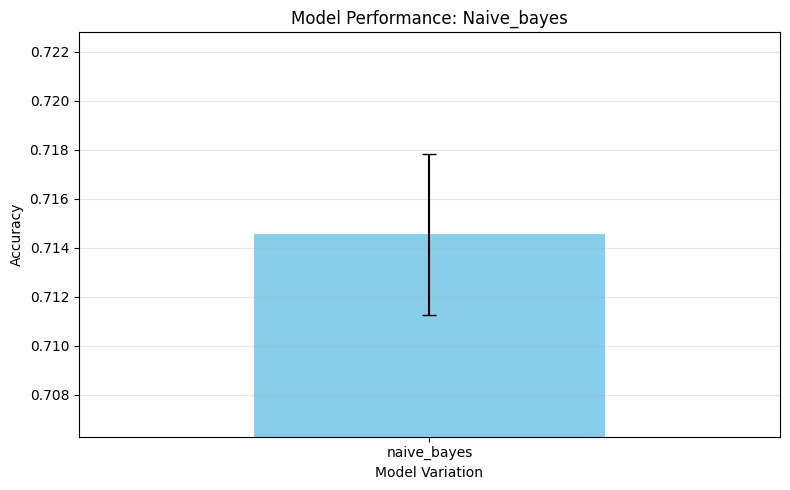

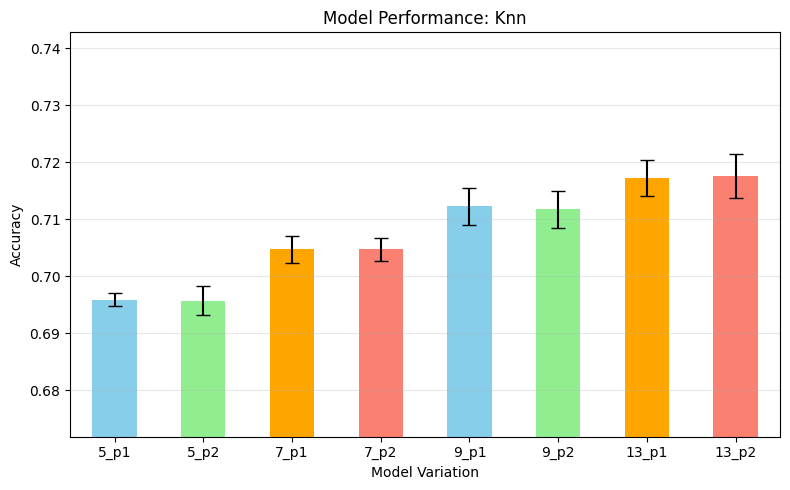

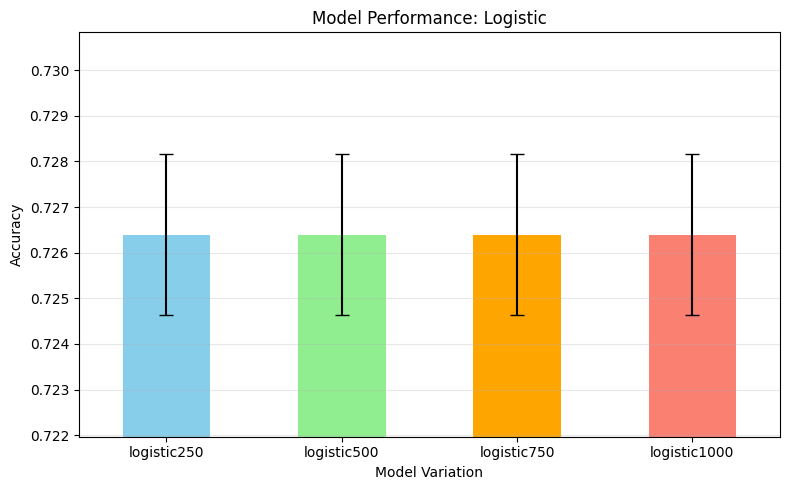

In [21]:
for alg, all_results_df in results.items():
    accuracy_means = all_results_df.loc['accuracy_mean']
    accuracy_stds = all_results_df.loc['accuracy_std']

    # Find the min and max values including the error bars
    min_y = (accuracy_means - accuracy_stds).min()
    max_y = (accuracy_means + accuracy_stds).max()
    
    # padding to top and bottom
    padding = (max_y - min_y) * 0.75
    y_axis_bottom = min_y - padding
    y_axis_top = max_y + padding
    # -------------------------------------

    # plot
    plt.figure(figsize=(8, 5))
    accuracy_means.plot(kind='bar', yerr=accuracy_stds, 
                        capsize=5, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
    
    plt.title(f'Model Performance: {alg.capitalize()}')
    plt.ylabel('Accuracy')
    plt.xlabel('Model Variation')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    
    # Y-axis limits
    plt.ylim(y_axis_bottom, y_axis_top) # <-- This is the new line
    
    plt.tight_layout()
    plt.show()

Best variants (by accuracy_mean): {'tree': 'entropy', 'naive_bayes': 'naive_bayes', 'knn': '13_p2', 'logistic': 'logistic250'}


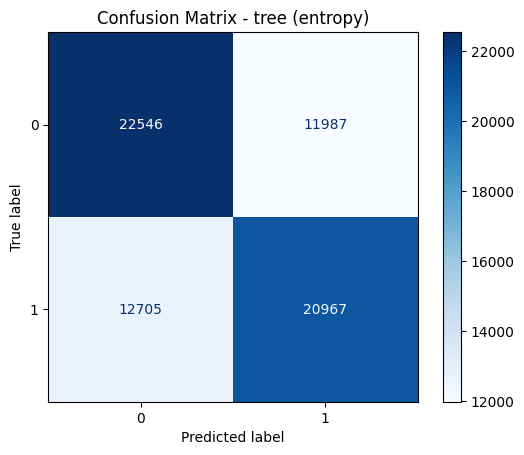

Classification Report - tree (entropy)
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     34533
           1       0.64      0.62      0.63     33672

    accuracy                           0.64     68205
   macro avg       0.64      0.64      0.64     68205
weighted avg       0.64      0.64      0.64     68205



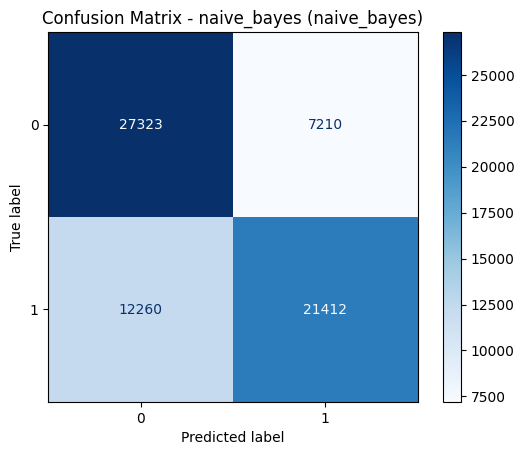

Classification Report - naive_bayes (naive_bayes)
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     34533
           1       0.75      0.64      0.69     33672

    accuracy                           0.71     68205
   macro avg       0.72      0.71      0.71     68205
weighted avg       0.72      0.71      0.71     68205



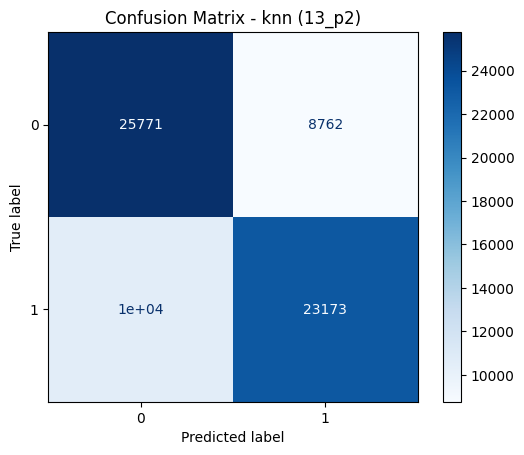

Classification Report - knn (13_p2)
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     34533
           1       0.73      0.69      0.71     33672

    accuracy                           0.72     68205
   macro avg       0.72      0.72      0.72     68205
weighted avg       0.72      0.72      0.72     68205



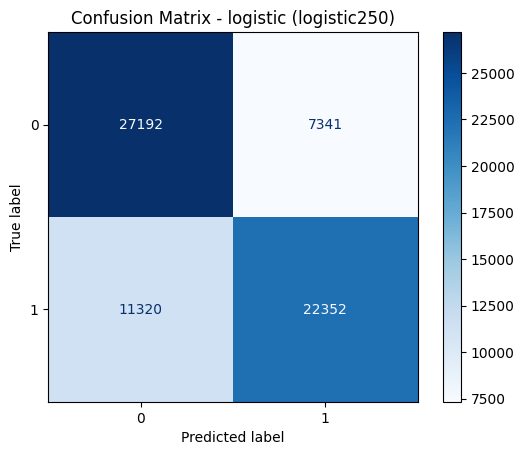

Classification Report - logistic (logistic250)
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     34533
           1       0.75      0.66      0.71     33672

    accuracy                           0.73     68205
   macro avg       0.73      0.73      0.73     68205
weighted avg       0.73      0.73      0.73     68205



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_predict

best_variants = {}

# Determine best variant per algorithm based on accuracy_mean
for alg, df_alg in results.items():
    if 'accuracy_mean' not in df_alg.index:
        continue
    accuracy_row = df_alg.loc['accuracy_mean']
    best_key = accuracy_row.idxmax()
    best_variants[alg] = best_key

print("Best variants (by accuracy_mean):", best_variants)

# Helper constructors mirroring earlier definitions
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

constructed_models = {}
for alg, key in best_variants.items():
    if alg == 'tree':
        # key is criterion name (gini/entropy)
        model = DecisionTreeClassifier(random_state=42, criterion=key)
    elif alg == 'naive_bayes':
        model = GaussianNB()
    elif alg == 'knn':
        # key pattern: "k_pP" e.g. 5_p2
        k_str, p_part = key.split('_p')
        k = int(k_str)
        p = int(p_part)
        model = KNeighborsClassifier(n_neighbors=k, p=p)
    elif alg == 'logistic':
        # key pattern: logistic250 etc.
        iter_count = int(key.replace('logistic', ''))
        model = LogisticRegression(max_iter=iter_count, random_state=42)
    elif alg == 'random_forest':
        # key pattern now: n{n_estimators}_md{max_depth}_a{alpha}
        parts = key.split('_')
        # Expect parts like ['n200', 'md10', 'a1e-05'] or ['n200', 'mdNone', 'a0.0']
        n_estimators = int(parts[0].replace('n', ''))
        md_value = parts[1].replace('md', '')
        max_depth = None if md_value == 'None' else int(md_value)
        ccp_alpha = 0.0
        if len(parts) >= 3 and parts[2].startswith('a'):
            try:
                ccp_alpha = float(parts[2][1:])
            except ValueError:
                ccp_alpha = 0.0
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            ccp_alpha=ccp_alpha,
            random_state=42,
            n_jobs=-1,
        )
    else:
        continue
    constructed_models[alg] = model

# Generate predictions and confusion matrices via cross_val_predict (uses same StratifiedKFold settings)
for alg, model in constructed_models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    y_pred = cross_val_predict(pipe, X, y, cv=kfold)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {alg} ({best_variants[alg]})')
    plt.show()
    print(f'Classification Report - {alg} ({best_variants[alg]})')
    print(classification_report(y, y_pred))

### Confusion Matrices for Top Performing Variants
The following cell selects the best variant (highest accuracy_mean) for each algorithm, performs cross-validated predictions using `cross_val_predict`, and plots confusion matrices along with a classification report. This helps visualize error types (false positives vs false negatives) beyond aggregate metrics.

Index(['model', 'model', 'model', 'model', 'mean_accuracy', 'std_dev'], dtype='object')